# Block Buster classification

In [8]:
import csv
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


## Load the dataset

In [9]:
data = pd.read_csv('data.csv')

## Preprocess the data

In [10]:
data['Gross'] = data['Gross'].str.replace(',', '').astype(float)
data['Meta_score'] = data['Meta_score'].astype(float)
data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)
data['Blockbuster'] = data['Gross'] > data['Gross'].median()

C:\Users\Moe\AppData\Local\Temp\ipykernel_24828\2184750832.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Meta_score'].fillna(data['Meta_score'].mean(), inplace=True)


## Select features and target

In [11]:
features = ['Meta_score', 'No_of_Votes', 'Released_Year']
X = data[features]
y = data['Blockbuster']

## Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head())

     Meta_score  No_of_Votes  Released_Year
29     90.00000      1231473           1977
535    71.00000       111512           1978
695    80.00000        37445           1973
557    77.97153        52573           1950
836    90.00000        59635           1985


## Train and evaluate multiple models

Random Forest Accuracy: 0.76


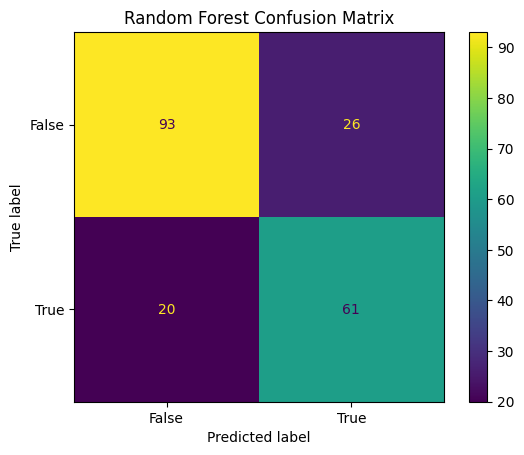

Logistic Regression Accuracy: 0.77


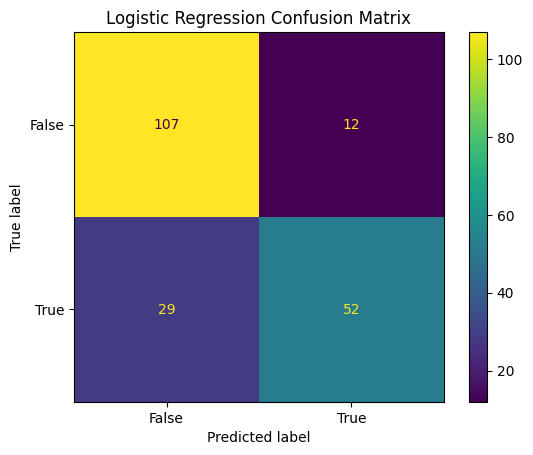

Support Vector Machine Accuracy: 0.80


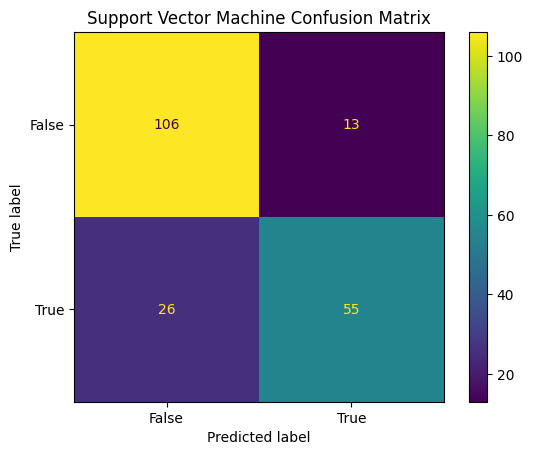

K-Nearest Neighbors Accuracy: 0.81


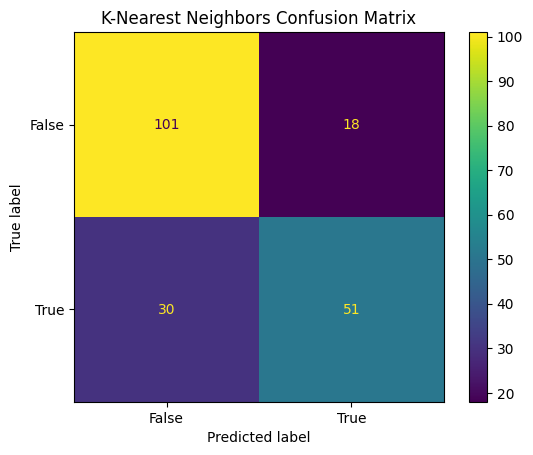

In [13]:
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Machine': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

accuracies = []
model_names = []

for name, model in models.items():

    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    model_names.append(name)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {acc:.2f}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.title(f'{name} Confusion Matrix')
    plt.show()


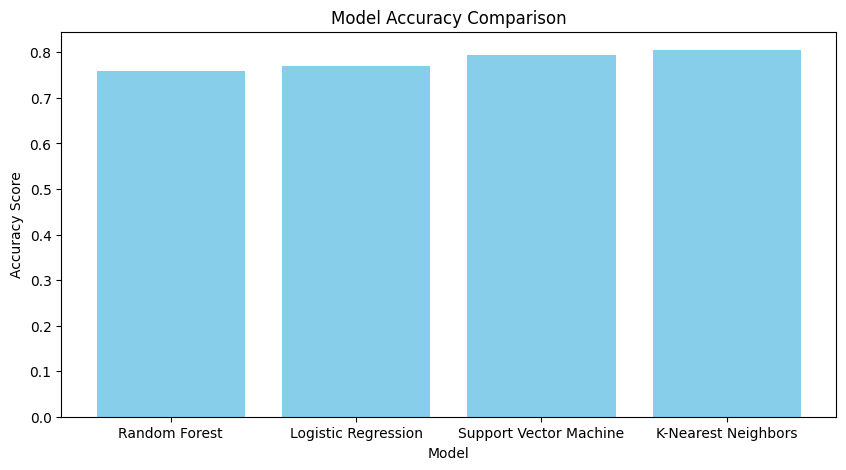

In [14]:
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.show()

## Classify a new movie (example) using Random Forest

In [15]:
new_movie = pd.DataFrame({
    'Meta_score': [8.5],
    'No_of_Votes': [1000000],
    'Released_Year': [2022]
})
prediction = models['Random Forest'].predict(new_movie)
print('Blockbuster' if prediction[0] else 'Non-blockbuster')

Blockbuster
